# QC vs Signal

Importing the QC file:

In [291]:
import pandas as pd

qc = pd.read_excel("mmc1-QC.xlsx")
print(qc.head())


        SampleName       CellType ImmGenLab    Lineage      CellFamily  \
0   LTHSC.34-.BM#1   LTHSC.34-.BM    Wagers  Stem&Prog  Stem&Prog Cell   
1   LTHSC.34+.BM#1   LTHSC.34+.BM    Wagers  Stem&Prog  Stem&Prog Cell   
2  STHSC.150-.BM#1  STHSC.150-.BM    Wagers  Stem&Prog  Stem&Prog Cell   
3   MPP4.135+.BM#1   MPP4.135+.BM    Wagers  Stem&Prog  Stem&Prog Cell   
4    proB.CLP.BM#1    proB.CLP.BM     Hardy          B          B Cell   

         Organ                                     SortingMarkers  \
0  Bone Marrow               Lin-Sca1+ckit+CD135-CD150+CD48-CD34-   
1  Bone Marrow               Lin-Sca1+ckit+CD135-CD150+CD48-CD34+   
2  Bone Marrow                    Lin-Sca1+ckit+CD135-CD150-CD48-   
3  Bone Marrow                               Lin-Sca1+ckit+CD135+   
4  Bone Marrow  CD19-IgM-CD43+CD24-CD45R-CD93+CD117+IL7Ra+PI-D...   

   InputCellNumber  PF.reads  %chrM.mapped  \
0              677  22287984          4.58   
1             2483  28588536          3.17   
2 

Extracting the two spreadsheets and creating a different file for each. Then, filtering them so we only have information relevant to abT and Tact cells:

In [314]:
# Read both sheets of the Excel table and keep only the cell types we will be working with
path = "mmc1-QC.xlsx"
sp = pd.read_excel(path, sheet_name="SortedPopulations")
rs = pd.read_excel(path, sheet_name="Read Statistics")

keep_names = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th",   "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp",
    "T.4.Sp.aCD3+CD40.18hr",
    "Treg.4.FP3+.Nrplo.Co", "Treg.4.25hi.Sp",
    "T8.TN.P14.Sp", "T8.IEL.LCMV.d7.SI", "T8.TE.LCMV.d7.Sp",
    "T8.MP.LCMV.d7.Sp", "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp",
    "NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d", 'LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'STHSC.150-.BM'
]
rs_filtered = rs[rs["population.name"].isin(keep_names) ].copy()
sp_filtered = sp[sp["CellType"].isin(keep_names)].copy()

print(f"SortedPopulations: {len(sp_filtered)}/{len(sp)} rows kept")
print(f"Read Statistics:   {len(rs_filtered)}/{len(rs)} rows kept")

sp_filtered.to_csv("SortedPopulations_abT-Tact.csv", index=False)
rs_filtered.to_csv("ReadStatistics_abT-Tact.csv",    index=False)

print("Filtered CSVs written:")
print(" - SortedPopulations_abT-Tact.csv")
print(" - ReadStatistics_abT-Tact.csv")


SortedPopulations: 54/181 rows kept
Read Statistics:   61/169 rows kept
Filtered CSVs written:
 - SortedPopulations_abT-Tact.csv
 - ReadStatistics_abT-Tact.csv


##### Now that we only have the rows relevant for abT, T.act, and progenitor cells, I want to have a better understanding of the metrics in the datasets. 

In [293]:
# Define file paths
files = {
    "SortedPopulations": "SortedPopulations_abT-Tact.csv",
    "ReadStatistics":   "ReadStatistics_abT-Tact.csv"
}

for name, path in files.items():
    df = pd.read_csv(path)
    print(f"=== {name} ({path}) columns ===")
    print(df.columns.tolist(), "\n")
    
    # Show dtypes & non-null counts
    print(f"--- {name} info ---")
    df.info()
    print("\n")


=== SortedPopulations (SortedPopulations_abT-Tact.csv) columns ===
['SampleName', 'CellType', 'ImmGenLab', 'Lineage', 'CellFamily', 'Organ', 'SortingMarkers', 'InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS', 'Replicate.cor'] 

--- SortedPopulations info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SampleName                                  54 non-null     object 
 1   CellType                                    54 non-null     object 
 2   ImmGenLab                                   54 non-null     object 
 3   Lineage                                     54 non-null     object 
 4   CellFamily                                  54 non-null     object 
 5   Organ                                       54 non-null   

In [ ]:
filtered_ATAC = pd.read_csv("../ATAC-seq/filtered_ATAC_abT_Tact_Stem.csv")
print(filtered_ATAC.columns.tolist())

filtered_ATAC.head()


['ImmGenATAC1219.peakID', 'chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,preT.DN1.Th,preT.DN2a.Th,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.11,0.77,...,0.71,2.78,0.56,0.11,0.64,1.14,0.41,0.71,0.90,0.11
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.77,0.77,...,0.94,3.56,0.98,2.12,0.12,0.11,0.41,1.64,0.90,0.83
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,0.40,0.77,...,1.32,2.79,0.56,1.72,0.12,0.11,2.36,0.10,0.90,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.46,0.11,...,3.41,0.11,2.86,0.11,0.64,2.20,0.41,0.10,0.11,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.77,0.84,...,0.94,0.11,1.59,0.51,0.12,0.53,0.41,0.10,0.11,0.11


Here I tried to find out if the two spreadsheets on the mmc1 file are one for the ATAC-seq and one for the RNA-seq datasets. 

I was only able to compare them to the ATAC-seq file because I had trouble finding the path to the RNA-seq file.

There are 25 similarities (or the same sample name) between the Sorted Populations spreadsheet and the ATAC-seq. Both spreadsheets refer to the ATAC-seq.


Sorted Populations -> ATAC-seq, biological QC metadata from the sorting and experimental side 

Read Statistics -> ATAC-seq, technical alignment and sequencing stats, focused on post-sequencing metrics

In [295]:
cols_from_9 = filtered_ATAC.columns[8:].tolist()

print(cols_from_9)

values_rs = rs_filtered["sample.name"].dropna().unique().tolist()

print(values_rs)

['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']
['LTHSC.34-.BM.rep1', 'LTHSC.34-.BM.rep2', 'LTHSC.34+.BM.rep1', 'LTHSC.34+.BM.rep2', 'STHSC.150-.BM.rep1', 'STHSC.150-.BM.rep2', 'MPP4.135+.BM.rep1', 'MPP4.135+.BM.rep2', 'preT.DN1.Th.rep1', 'preT.DN1.Th.rep2', 'preT.DN2a.Th.rep1', 'preT.DN2a.Th.rep2', 'preT.DN2b.Th.rep1', 'preT.DN2b.Th.rep2', 'preT.DN3.Th.rep1', 'preT.DN3.Th.rep2', 'preT.DN3.Th.rep3', 'T.DN4.Th.rep1', 'T.DN4.Th.rep2', 'T.DN4.Th.rep3', 'T.ISP.Th.rep1', 'T.ISP.Th.rep2', 'T.ISP.Th.rep3', 'T.DP.Th.rep1', 'T.DP.Th.rep2', 'T.4.Th.rep1', 'T.4.Th.rep2'

In [296]:
set_cols = set(cols_from_9)
set_vals_rs = set(values_rs)

in_both   = sorted(set_cols & set_vals_rs)

print(f"In both ({len(in_both)}): {in_both}")

In both (0): []


No similarities (or corresponding sample names) between Read Statistics and the ATAC-seq samples.

In [297]:
cols_from_9 = filtered_ATAC.columns[8:].tolist()

print(cols_from_9)

values_sp = sp_filtered["CellType"].dropna().unique().tolist()

print(values_sp)

['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']
['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T.8.Nve.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']


In [298]:
set_cols = set(cols_from_9)
set_vals_sp = set(values_sp)

in_both   = sorted(set_cols & set_vals_sp)

print(f"In both ({len(in_both)}): {in_both}")

In both (29): ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'STHSC.150-.BM', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.IEL.LCMV.d7.SI', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


25 similarities between Sorted Populations spreadsheet and ATAC-seq

## Some descriptive info about sp_filtered (sorted populations)

Here is a summary of some relevant metrics for quality control:

In [299]:
metrics = [
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor"
]

summary = sp_filtered[metrics].describe()

print(summary)

           PF.reads  %chrM.mapped  Paired.read.after.removing.PCR.duplication  \
count  5.400000e+01     54.000000                                5.400000e+01   
mean   2.477447e+07      6.165926                                6.944127e+06   
std    6.744341e+06      3.350607                                2.222926e+06   
min    1.635983e+07      0.790000                                2.470102e+06   
25%    2.065860e+07      3.905000                                5.667989e+06   
50%    2.335110e+07      5.500000                                6.608028e+06   
75%    2.710606e+07      7.555000                                7.494239e+06   
max    5.141700e+07     16.170000                                1.602954e+07   

       %fragment.1Kb_TSS  Replicate.cor  
count          54.000000      50.000000  
mean           13.460000       0.922120  
std             5.178751       0.034687  
min             5.080000       0.812000  
25%             9.642500       0.907000  
50%            12.

A new dataframe with only the relevant metrics from sp_filtered:

In [300]:
# Define the columns we are keeping
cols = [
    "CellType",
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor"
]

# Create the new DataFrame
sp_subset = sp_filtered[cols].copy()
print(sp_subset.shape)
print(sp_subset)


(54, 6)
                 CellType  PF.reads  %chrM.mapped  \
0            LTHSC.34-.BM  22287984          4.58   
1            LTHSC.34+.BM  28588536          3.17   
2           STHSC.150-.BM  22170346          3.25   
3            MPP4.135+.BM  24003590         13.83   
43            preT.DN1.Th  19026598         14.70   
44            preT.DN1.Th  20192378         10.23   
45           preT.DN2a.Th  19933426          9.66   
46           preT.DN2a.Th  19734270         13.65   
47           preT.DN2b.Th  21434838          7.63   
48           preT.DN2b.Th  18688970          8.91   
49            preT.DN3.Th  21256228          5.87   
50            preT.DN3.Th  32413088          4.68   
51               T.DN4.Th  22523848          7.03   
52               T.DN4.Th  24642926          9.67   
53               T.ISP.Th  17715752          8.16   
54               T.ISP.Th  16359826          5.35   
55                T.DP.Th  51416996          1.16   
56                T.DP.Th  44077680   

Yet another dataframe with only the relevant metrics from sp_filtered. I thought this was gonna remove some samples because the datasets had some differences, but apparently this and the dataframe from the previous steps are identical.

In [301]:
# Define the columns you want
cols = [
    "CellType",
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor",
]

# Subset both rows (by CellType) and columns
sp_subset2 = (
    sp_filtered
    .loc[sp_filtered["CellType"].isin(in_both), cols]
    .copy()
)

# Inspect the result
print(sp_subset2.shape)
print(sp_subset2)


(54, 6)
                 CellType  PF.reads  %chrM.mapped  \
0            LTHSC.34-.BM  22287984          4.58   
1            LTHSC.34+.BM  28588536          3.17   
2           STHSC.150-.BM  22170346          3.25   
3            MPP4.135+.BM  24003590         13.83   
43            preT.DN1.Th  19026598         14.70   
44            preT.DN1.Th  20192378         10.23   
45           preT.DN2a.Th  19933426          9.66   
46           preT.DN2a.Th  19734270         13.65   
47           preT.DN2b.Th  21434838          7.63   
48           preT.DN2b.Th  18688970          8.91   
49            preT.DN3.Th  21256228          5.87   
50            preT.DN3.Th  32413088          4.68   
51               T.DN4.Th  22523848          7.03   
52               T.DN4.Th  24642926          9.67   
53               T.ISP.Th  17715752          8.16   
54               T.ISP.Th  16359826          5.35   
55                T.DP.Th  51416996          1.16   
56                T.DP.Th  44077680   

Imported Bobi's dataframe basic_stats_df.

In [302]:
basic_stats_df = pd.read_csv("../Descriptive_Stat_ATAC/basic_stats_df.csv")

basic_stats_df

,Unnamed: 0,Sample ID,Mean,Median,SD,CV
0,0,preT.DN1.Th,4.006249,1.34,9.896460,2.470256
1,1,preT.DN2a.Th,4.009777,1.20,9.849384,2.456342
2,2,preT.DN2b.Th,4.001368,1.34,9.831580,2.457055
3,3,preT.DN3.Th,3.999144,1.40,9.830203,2.458077
4,4,T.DN4.Th,4.000097,1.47,9.819900,2.454915
5,5,T.ISP.Th,3.990197,1.54,9.660167,2.420975
6,6,T.DP.Th,4.002725,1.51,9.797414,2.447686
7,7,T.4.Th,3.984623,1.45,9.828451,2.466595
8,8,T.8.Th,3.988538,1.48,9.886826,2.478810
9,9,T.4.Nve.Sp,3.996412,1.37,9.819407,2.457056


Checking if the dataframes are in the same order. They weren't.

In [303]:
# Extract the two lists
ids       = basic_stats_df["Sample ID"].tolist()
celltypes = sp_subset2["CellType"].tolist()

# Check for exact match (order, length, and content)
if ids == celltypes:
    print("'Sample ID' and 'CellType' match exactly.")
else:
    print("They do not match exactly.")

    # Find and report mismatches
    min_len = min(len(ids), len(celltypes))
    diffs = [
        (i, ids[i], celltypes[i])
        for i in range(min_len)
        if ids[i] != celltypes[i]
    ]
    for idx, id_val, ct_val in diffs:
        print(f" - Position {idx}: Sample ID = '{id_val}' vs CellType = '{ct_val}'")

    # Report any extra entries if lengths differ
    if len(ids) > len(celltypes):
        extra = ids[len(celltypes):]
        print(f" - basic_stats_df has extra IDs starting at position {len(celltypes)}: {extra}")
    elif len(celltypes) > len(ids):
        extra = celltypes[len(ids):]
        print(f" - sp_subset2 has extra CellTypes starting at position {len(ids)}: {extra}")


They do not match exactly.
 - Position 0: Sample ID = 'preT.DN1.Th' vs CellType = 'LTHSC.34-.BM'
 - Position 1: Sample ID = 'preT.DN2a.Th' vs CellType = 'LTHSC.34+.BM'
 - Position 2: Sample ID = 'preT.DN2b.Th' vs CellType = 'STHSC.150-.BM'
 - Position 3: Sample ID = 'preT.DN3.Th' vs CellType = 'MPP4.135+.BM'
 - Position 4: Sample ID = 'T.DN4.Th' vs CellType = 'preT.DN1.Th'
 - Position 5: Sample ID = 'T.ISP.Th' vs CellType = 'preT.DN1.Th'
 - Position 6: Sample ID = 'T.DP.Th' vs CellType = 'preT.DN2a.Th'
 - Position 7: Sample ID = 'T.4.Th' vs CellType = 'preT.DN2a.Th'
 - Position 8: Sample ID = 'T.8.Th' vs CellType = 'preT.DN2b.Th'
 - Position 9: Sample ID = 'T.4.Nve.Sp' vs CellType = 'preT.DN2b.Th'
 - Position 10: Sample ID = 'T.4.Nve.Fem.Sp' vs CellType = 'preT.DN3.Th'
 - Position 11: Sample ID = 'T.4.Sp.aCD3+CD40.18hr' vs CellType = 'preT.DN3.Th'
 - Position 12: Sample ID = 'T.8.Nve.Sp' vs CellType = 'T.DN4.Th'
 - Position 13: Sample ID = 'Treg.4.25hi.Sp' vs CellType = 'T.DN4.Th'
 - P

As we saw before, there are 25 similarities between the datasets.

In [318]:
# Extract the two lists
ids       = basic_stats_df["Sample ID"].dropna().tolist()
celltypes = sp_subset2["CellType"].dropna().tolist()

# Find any matches regardless of order
matches = set(ids).intersection(celltypes)

if matches:
    print(f"Matches found ({len(matches)}): {sorted(matches)}")
else:
    print("No matches found between 'Sample ID' and 'CellType'.")


Matches found (29): ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'STHSC.150-.BM', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.IEL.LCMV.d7.SI', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


Then I reordered them so the cell types/samples correspond between the two dataframes and we can analyze them further.

In [320]:
# Build the desired order from sp_filtered’s CellType column,
# keeping only those IDs present in filtered_stats_df
order = [
    ct for ct in sp_filtered["CellType"].tolist()
    if ct in basic_stats_df["Sample ID"].values
]

# Reorder filtered_stats_df by that list
filtered_stats_ordered = (
    basic_stats_df
    .set_index("Sample ID")
    .loc[order]               # filters + reorders
    .reset_index()            # bring Sample ID back as a column
    .copy()
)

# Quick sanity check
print("New order matches sp_filtered CellType order:")
print((filtered_stats_ordered["Sample ID"] == order).all())
print(filtered_stats_ordered.head())

print(len(filtered_stats_ordered["Sample ID"]))


New order matches sp_filtered CellType order:
True
       Sample ID  Unnamed: 0      Mean  Median         SD        CV
0   LTHSC.34-.BM          25  3.868438    0.41  10.004101  2.586083
1   LTHSC.34+.BM          26  4.005767    1.64   9.986633  2.493064
2  STHSC.150-.BM          27  4.001125    0.90   9.991892  2.497271
3   MPP4.135+.BM          28  4.002324    1.58   9.994831  2.497257
4    preT.DN1.Th           0  4.006249    1.34   9.896460  2.470256
54


Then I plotted the mean signal from the ATAC-seq data vs. the paired read after removing PCR duplication. However, I do not understand how this is relevant or if this is even the right things to plot. I assume because the dots aren't completely random that this means something.

Length of x: 54
Length of y: 54


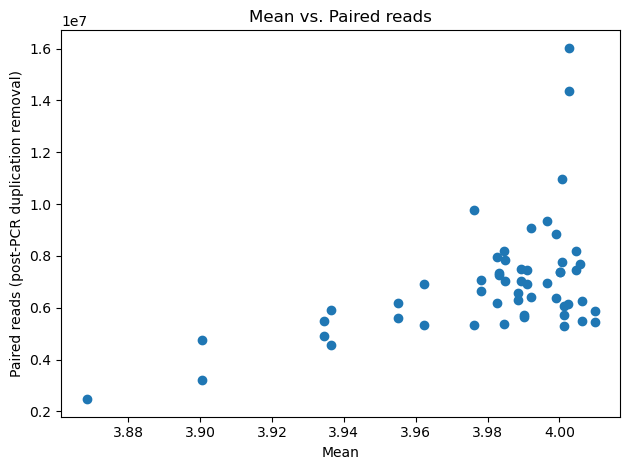

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Pull out 'mean' reindexed to `common`
x = (
    filtered_stats_ordered
    .set_index("Sample ID")        # index by Sample ID
    ["Mean"]                       # select the column
)

# Pull out the paired-reads metric, likewise reindexed
y = (
    sp_filtered
    .set_index("CellType")         # index by CellType
    ["Paired.read.after.removing.PCR.duplication"]
)

# Quick sanity check
print("Length of x:", len(x))
print("Length of y:", len(y))
assert len(x) == len(y), "Still mismatched lengths!"

# Plot
plt.figure()
plt.scatter(x.values, y.values)
plt.xlabel("Mean")
plt.ylabel("Paired reads (post-PCR duplication removal)")
plt.title("Mean vs. Paired reads")
plt.tight_layout()
plt.show()



Now we want to merge ATAC signal stats with the QC metrics

In [309]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [308]:
# Loading ATAC signal stats -> basic_stats_df.csv
atac_stats = pd.read_csv("basic_stats_df.csv")

# Loading QC reference table 
read_stats = pd.read_csv("ReadStatistics_abT-Tact.csv")

We are usign the ReadStatistics_abT-Tact.csv table for now since we are interested to rule out technical confounders at this stage. We are answering the question: "Is the signal variability caused by technical factors?" 

We are going to need the SortedPopulations.csv file later when we will be trying to interpret biological variations, for example cell-type specific signals, but for now we are working with the ReadStatistics one.

In [ ]:
# Seeing if the names of the columns are equal 
print("ATAC stats columns:", atac_stats.columns.tolist())
print("Read stats columns:", read_stats.columns.tolist())

ATAC stats columns: ['Unnamed: 0', 'Sample ID', 'Mean', 'Median', 'SD', 'CV']
Read stats columns: ['ImmGen.lab.contributed', 'sample.name', 'population.name', 'total.reads', 'overal_ alignment_rate%', 'mapped_MAPQ5', 'reads.after.removing.duplication', 'properly_paired.reads', 'paired.count', 'total.Htseq-count.on.genes']


The names of the columns of both datasets are not equal wich means we have to merge using the different column names (see code below)

In [ ]:
# Merging on 'sample_id' and joining the datasets
merged = pd.merge(
    atac_stats,
    read_stats,
    left_on="Sample ID",
    right_on="sample.name"
)
merged.head()

,Unnamed: 0,Sample ID,Mean,Median,SD,CV,ImmGen.lab.contributed,sample.name,population.name,total.reads,overal_ alignment_rate%,mapped_MAPQ5,reads.after.removing.duplication,properly_paired.reads,paired.count,total.Htseq-count.on.genes


Now we have connected the metrics (ATAC signal) with the factors that might affect them (QC data) and want to explore that relationship further.

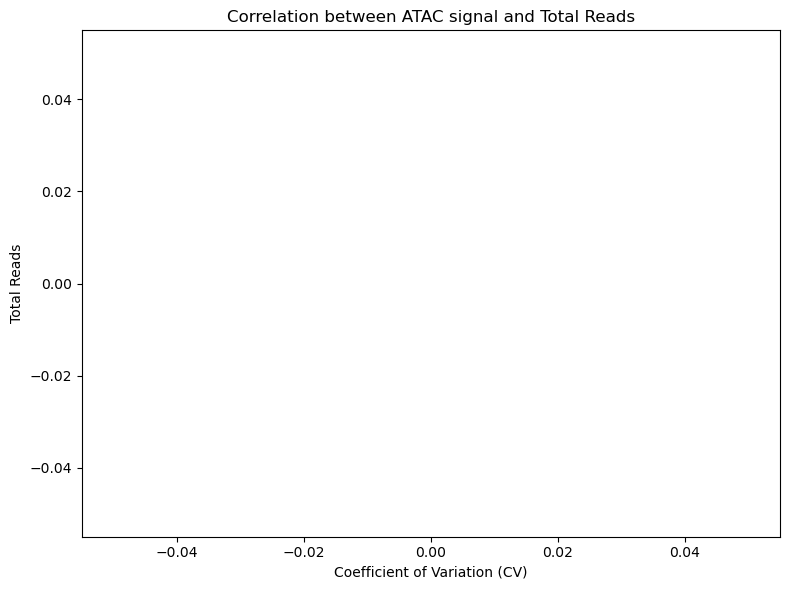

In [ ]:
# scatter + regression plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x="CV", y="total.reads")
sns.regplot(data=merged, x="CV", y="total.reads", scatter=False, color="red")

plt.title("Correlation between ATAC signal and Total Reads")
plt.xlabel("Coefficient of Variation (CV)")
plt.ylabel("Total Reads")
plt.tight_layout()
plt.show()

This figure appears blank which is a problem, it means that the columns give out the value 0. So in the next step we want to see if there are any NA values in the data.

In [ ]:
print(merged[["CV", "total.reads"]].info())
print(merged[["CV", "total.reads"]].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CV           0 non-null      float64
 1   total.reads  0 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 124.0 bytes
None
Empty DataFrame
Columns: [CV, total.reads]
Index: []


There are not any NA values, so the problem is elsewhere. 

In [ ]:
print(atac_stats["Sample ID"].unique())
print(read_stats["sample.name"].unique())

['preT.DN1.Th' 'preT.DN2a.Th' 'preT.DN2b.Th' 'preT.DN3.Th' 'T.DN4.Th'
 'T.ISP.Th' 'T.DP.Th' 'T.4.Th' 'T.8.Th' 'T.4.Nve.Sp' 'T.4.Nve.Fem.Sp'
 'T.4.Sp.aCD3+CD40.18hr' 'T.8.Nve.Sp' 'Treg.4.25hi.Sp'
 'Treg.4.FP3+.Nrplo.Co' 'T8.TN.P14.Sp' 'T8.TE.LCMV.d7.Sp'
 'T8.MP.LCMV.d7.Sp' 'T8.IEL.LCMV.d7.SI' 'T8.Tcm.LCMV.d180.Sp'
 'T8.Tem.LCMV.d180.Sp' 'NKT.Sp' 'NKT.Sp.LPS.3hr' 'NKT.Sp.LPS.18hr'
 'NKT.Sp.LPS.3d' 'LTHSC.34-.BM' 'LTHSC.34+.BM' 'STHSC.150-.BM'
 'MPP4.135+.BM']
['LTHSC.34-.BM.rep1' 'LTHSC.34-.BM.rep2' 'LTHSC.34+.BM.rep1'
 'LTHSC.34+.BM.rep2' 'STHSC.150-.BM.rep1' 'STHSC.150-.BM.rep2'
 'MPP4.135+.BM.rep1' 'MPP4.135+.BM.rep2' 'preT.DN1.Th.rep1'
 'preT.DN1.Th.rep2' 'preT.DN2a.Th.rep1' 'preT.DN2a.Th.rep2'
 'preT.DN2b.Th.rep1' 'preT.DN2b.Th.rep2' 'preT.DN3.Th.rep1'
 'preT.DN3.Th.rep2' 'preT.DN3.Th.rep3' 'T.DN4.Th.rep1' 'T.DN4.Th.rep2'
 'T.DN4.Th.rep3' 'T.ISP.Th.rep1' 'T.ISP.Th.rep2' 'T.ISP.Th.rep3'
 'T.DP.Th.rep1' 'T.DP.Th.rep2' 'T.4.Th.rep1' 'T.4.Th.rep2' 'T.8.Th.rep1'
 'T.8.Th.rep2' 'T.4.Nve.S

This shows that the data in the ReadStatistics_abT-Tact.csv is in replicates while the one from the basic_stats_df.csv (ATAC) is not. So for the merging to work correctly and for the tables to not appear blank, we have to calculate the mean of the replicates and then merge again.

In [ ]:
# Extracting base sample ID (removes replicate info from sample.name: e.g. preT.DN1.Th.rep1 -> preT.DN1.Th)
read_stats["Sample ID"] = read_stats["sample.name"].str.replace(r"\.rep\d+$", "", regex=True)

# Grouping by "Sample ID" and computing mean QC metrics
grouped_read_stats = read_stats.groupby("Sample ID").mean(numeric_only=True).reset_index()

# Merging with ATAC signal stats (again!)
merged = pd.merge(atac_stats, grouped_read_stats, on="Sample ID")

# Preview merged data
print("Merged rows:", len(merged))
merged.head()

Merged rows: 29


,Unnamed: 0,Sample ID,Mean,Median,SD,CV,total.reads,overal_ alignment_rate%,mapped_MAPQ5,reads.after.removing.duplication,properly_paired.reads,paired.count,total.Htseq-count.on.genes
0,0,preT.DN1.Th,4.006249,1.34,9.896460,2.470256,2.121523e+07,58.975000,11947369.5,7.493344e+06,7081277.0,3540638.5,3.431652e+06
1,1,preT.DN2a.Th,4.009777,1.20,9.849384,2.456342,1.503806e+07,63.070000,8992202.0,6.155724e+06,5837672.0,2918836.0,2.832478e+06
2,2,preT.DN2b.Th,4.001368,1.34,9.831580,2.457055,1.945124e+07,62.110000,11551595.0,7.450570e+06,7085783.0,3542891.5,3.433948e+06
3,3,preT.DN3.Th,3.999144,1.40,9.830203,2.458077,1.808015e+07,64.946667,11121280.0,7.244648e+06,6910766.0,3455383.0,3.355039e+06
4,4,T.DN4.Th,4.000097,1.47,9.819900,2.454915,1.233319e+07,66.696667,7803201.0,5.318063e+06,5055862.0,2527931.0,2.449104e+06


Now that we have successfully merged the data we can proceed with the analysis.

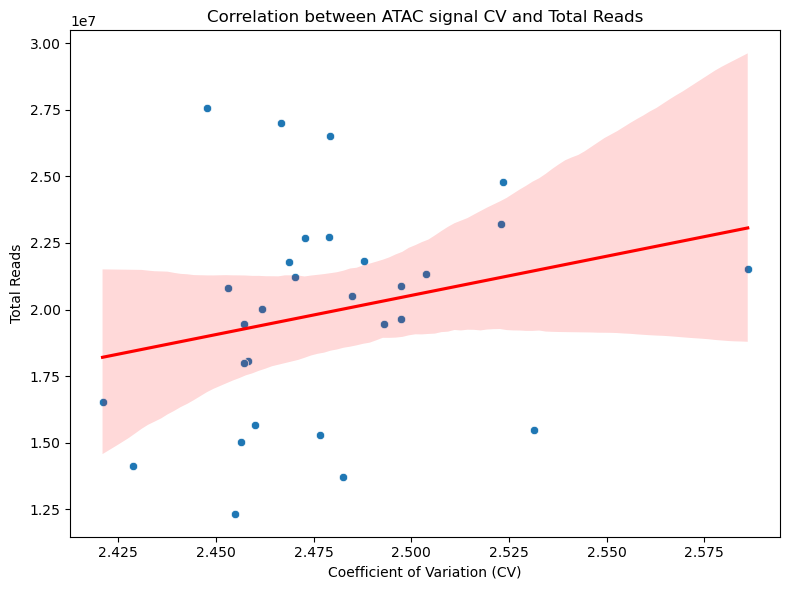

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged, x="CV", y="total.reads")
sns.regplot(data=merged, x="CV", y="total.reads", scatter=False, color="red")

plt.title("Correlation between ATAC signal CV and Total Reads")
plt.xlabel("Coefficient of Variation (CV)")
plt.ylabel("Total Reads")
plt.tight_layout()
plt.show()

**Fig. 2**: Scatterplot with a linear regression overlay. 

The red line shows the best-fit regression line and tha shaded area the 95% confidence interval.

We can see a positive trend as the line generally goes upward which suggest a positive correlation between signal variabilty and sequencing depth. It is possible that samples with higher sequencing depth show more variation in ATAC signal, potentially because deeper coverage exposes more heterogeneity or noise. 

However, the trend seems pretty weak since the slope is shallow and the confidence band is wide = noisy correlaion; not all samples follow the trend closely

That is why we want to quantify the strenght of the correlation next.

In [ ]:
from scipy.stats import pearsonr, spearmanr

x = merged["CV"]
y = merged["total.reads"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f"Pearson r = {pearson_r:.3f}, p = {p_pearson:.3g}")
print(f"Spearman r = {spearman_r:.3f}, p = {p_spearman:.3g}")


Pearson r = 0.243, p = 0.203
Spearman r = 0.322, p = 0.0883


The Pearson and Spearman correlation show that there is a weak trend: as total reads increase, so might signal variability.

However, the relationship is not statistically signicant (p>0.05), so we cannot confidently draw any conclusions from it - it could just be variation. 

Spearman correlation is slightly stronger and suggests there might be a non-linear relationship.

In the next step, we might want to try other QC metrics, but honestly it is late and I do not know what they will tell us.
___

### Plotting other QC values against signal

Using the same approach, we can also analyze other QC metrics. Here we will be looking at the ***alignment rate*** and the ***mapped MAPQ5***.

#### A. Alignment rate
The alignment rate shows what percentage of all reads can be mapped to the reference genome. Here we will look into its relationship with the mean, median and CV of ATAC signal.

In [ ]:
merged.head()

,Unnamed: 0,Sample ID,Mean,Median,SD,CV,total.reads,overal_ alignment_rate%,mapped_MAPQ5,reads.after.removing.duplication,properly_paired.reads,paired.count,total.Htseq-count.on.genes
0,0,preT.DN1.Th,4.006249,1.34,9.896460,2.470256,2.121523e+07,58.975000,11947369.5,7.493344e+06,7081277.0,3540638.5,3.431652e+06
1,1,preT.DN2a.Th,4.009777,1.20,9.849384,2.456342,1.503806e+07,63.070000,8992202.0,6.155724e+06,5837672.0,2918836.0,2.832478e+06
2,2,preT.DN2b.Th,4.001368,1.34,9.831580,2.457055,1.945124e+07,62.110000,11551595.0,7.450570e+06,7085783.0,3542891.5,3.433948e+06
3,3,preT.DN3.Th,3.999144,1.40,9.830203,2.458077,1.808015e+07,64.946667,11121280.0,7.244648e+06,6910766.0,3455383.0,3.355039e+06
4,4,T.DN4.Th,4.000097,1.47,9.819900,2.454915,1.233319e+07,66.696667,7803201.0,5.318063e+06,5055862.0,2527931.0,2.449104e+06


Pearson r = 0.167, p = 0.386
Spearman r = 0.308, p = 0.104


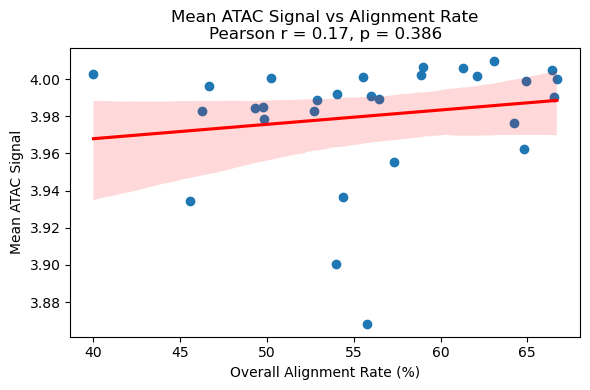

In [ ]:
# Onto the code (!!!for some reason there is a space in the name of the column)
x = merged["overal_ alignment_rate%"]
y = merged["Mean"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="overal_ alignment_rate%", y="Mean", scatter=False, color="red")
plt.title(f"Mean ATAC Signal vs Alignment Rate\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Overall Alignment Rate (%)")
plt.ylabel("Mean ATAC Signal")
plt.tight_layout()
plt.show()


Pearson r = -0.101, p = 0.602
Spearman r = -0.0847, p = 0.662


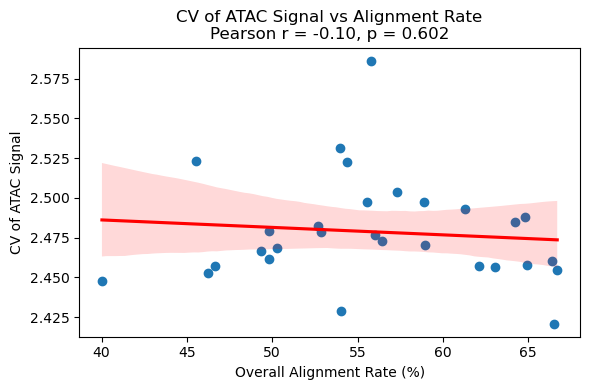

In [ ]:
x = merged["overal_ alignment_rate%"]
y = merged["CV"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="overal_ alignment_rate%", y="CV", scatter=False, color="red")
plt.title(f"CV of ATAC Signal vs Alignment Rate\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Overall Alignment Rate (%)")
plt.ylabel("CV of ATAC Signal")
plt.tight_layout()
plt.show()

Pearson r = -0.0734, p = 0.705
Spearman r = -0.122, p = 0.527


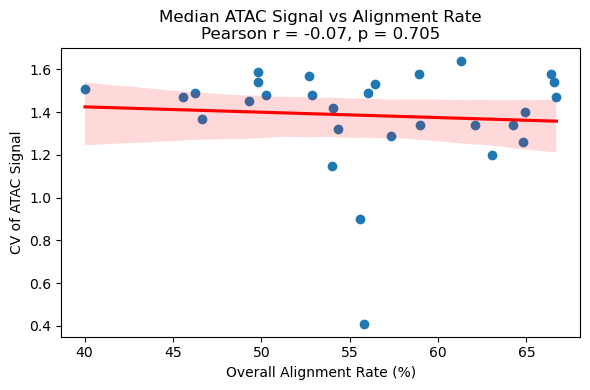

In [ ]:
x = merged["overal_ alignment_rate%"]
y = merged["Median"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="overal_ alignment_rate%", y="Median", scatter=False, color="red")
plt.title(f"Median ATAC Signal vs Alignment Rate\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Overall Alignment Rate (%)")
plt.ylabel("CV of ATAC Signal")
plt.tight_layout()
plt.show()

In all three cases there is a fairly small correlation with p-values higher than 0.05, meaning that the results are not significantly impacted by the alignment rate.
___

#### B. Mapped MAPQ5
This metric show all 

Pearson r = -0.0977, p = 0.614
Spearman r = -0.178, p = 0.355


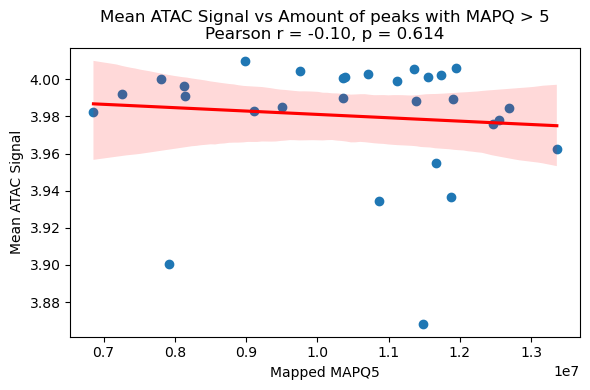

In [ ]:
x = merged["mapped_MAPQ5"]
y = merged["Mean"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="mapped_MAPQ5", y="Mean", scatter=False, color="red")
plt.title(f"Mean ATAC Signal vs Amount of peaks with MAPQ > 5\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Mapped MAPQ5")
plt.ylabel("Mean ATAC Signal")
plt.tight_layout()
plt.show()

Pearson r = 0.264, p = 0.166
Spearman r = 0.377, p = 0.0439


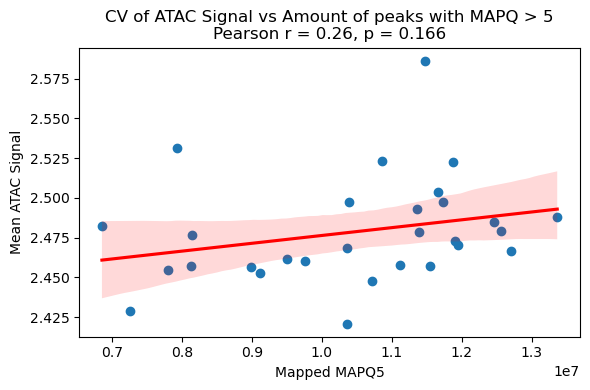

In [ ]:
x = merged["mapped_MAPQ5"]
y = merged["CV"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="mapped_MAPQ5", y="CV", scatter=False, color="red")
plt.title(f"CV of ATAC Signal vs Amount of peaks with MAPQ > 5\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Mapped MAPQ5")
plt.ylabel("Mean ATAC Signal")
plt.tight_layout()
plt.show()

Pearson r = -0.0905, p = 0.641
Spearman r = -0.105, p = 0.588


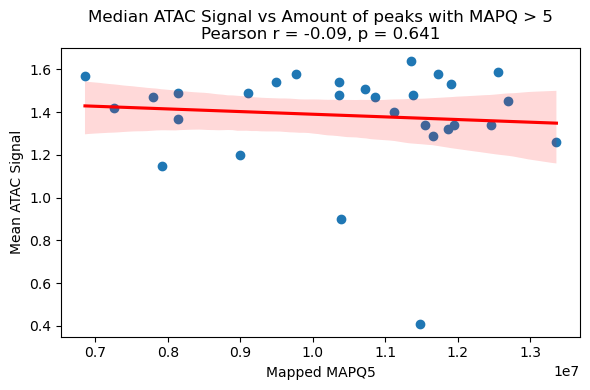

In [ ]:
x = merged["mapped_MAPQ5"]
y = merged["Median"]

pearson_r, p_pearson = pearsonr(x, y)
spearman_r, p_spearman = spearmanr(x, y)

print(f'Pearson r = {pearson_r:.3g}, p = {p_pearson:.3g}\nSpearman r = {spearman_r:.3g}, p = {p_spearman:.3g}')

plt.figure(figsize=(6, 4))
plt.scatter(x, y)
sns.regplot(data=merged, x="mapped_MAPQ5", y="Median", scatter=False, color="red")
plt.title(f"Median ATAC Signal vs Amount of peaks with MAPQ > 5\nPearson r = {pearson_r:.2f}, p = {p_pearson:.3g}")
plt.xlabel("Mapped MAPQ5")
plt.ylabel("Mean ATAC Signal")
plt.tight_layout()
plt.show()

Similar to the alignment rate, the mapped MAPQ5 metric for the most part does not seem to impact the signal significantly. Nevertheless, it should be mentioned that the Spearman correlation for the coefficient of variance is smaller than 0.05. (to be continued)